## Graph Definition ##

Three common implementations of graphs:
- Nodes with pointers to neighbouring nodes
- Matrix
- Adjacancy list

The following uses adjacancy lists, when calling the 'add_edge' method the graph will add the 'to' node to the list of neighbouring nodes for the 'from' node in a dictionary of lists called 'edges'.

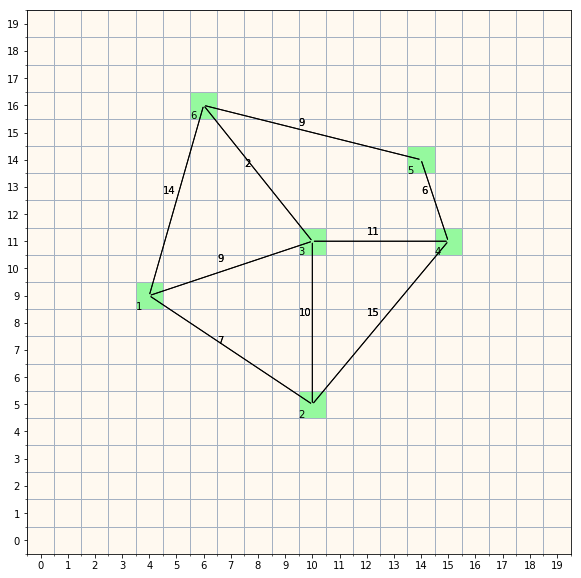

In [82]:
from utilities.graph import Node, Graph

# Create a new graph to hold our nodes and edges
graph = Graph()
        
#             name   pos <- used only for displying the graph visually
node_1 = Node("1", (4, 9))
node_2 = Node("2", (10, 5))
node_3 = Node("3", (10, 11))
node_4 = Node("4", (15, 11))
node_5 = Node("5", (14, 14))
node_6 = Node("6", (6, 16))

# 1         from     to  weight
graph.add_edge(node_1, node_2, 7)
graph.add_edge(node_1, node_3, 9)
graph.add_edge(node_1, node_6, 14)

# 2
graph.add_edge(node_2, node_3, 10)
graph.add_edge(node_2, node_4, 15)

# 3
graph.add_edge(node_3, node_4, 11)
graph.add_edge(node_3, node_6, 2)

# 4
graph.add_edge(node_4, node_5, 6)

# 5
graph.add_edge(node_5, node_6, 9)

# Display our grid
graph.show()

## Dijsktra's Algorithm ##

This will find the shortest path between two nodes in a set of connected nodes.

Worst case perfromance: **O(|E| + |V|log|V|)**

Node('5', pos=(14, 14)) Node('6', pos=(6, 16))
Node('6', pos=(6, 16)) Node('3', pos=(10, 11))
Node('3', pos=(10, 11)) Node('1', pos=(4, 9))
Node('1', pos=(4, 9)) None
Weight: 20


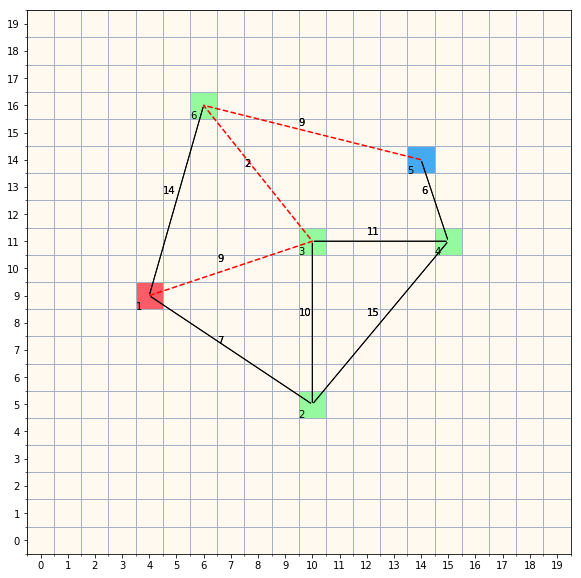

In [103]:
def dijkstra(graph, start, end):
    
    unvisited = list(graph.edges.keys())
    dist = dict(map(lambda n: (n, float('Inf')), graph.edges.keys()))
    prev = dict(map(lambda n: (n, None),         graph.edges.keys()))
    
    dist[start] = 0

    while unvisited:
        current_node_dist = (None, float('Inf')) # node, min_dist
        
        for (node, d) in dist.items():
            if node in unvisited and d < current_node_dist[1]:
                current_node_dist = (node, d)
                
        current = current_node_dist[0]        
        if current is None:
            raise ValueError("Could not reach end node.")
                
        unvisited.remove(current)

        neighbors = graph.edges[current]
        for (node, w) in neighbors:
            new_dist = dist[current] + w
            if new_dist < dist[node]:
                dist[node] = new_dist
                prev[node] = current

    path = []
    current = end

    while start not in path:
        path = [current] + path
        current = prev[current]

    length = dist[end]
    return (path, length)


path, weight = dijkstra(graph, node_1, node_5)
print("Weight:", weight)

graph.show(start=node_1, end=node_5, path=path)

## Grid Definition ##

A grid is defined simply by the size of its side and is assumed to be square. A grid can also contain obsticales which define a higher cost to cross defined in the cost function (g). A-star decides its path based on a heuristic function (h).

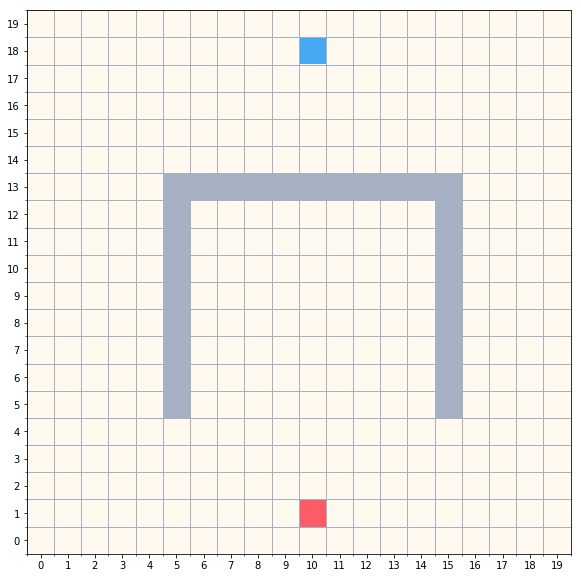

In [175]:
from importlib import reload
import utilities

reload(utilities.grid)

from utilities.grid import Grid
from math import sqrt

def h(a, b):
    D, D2 = 1, 2
    
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])

    return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
    # alt: return sqrt(dx ** 2 + dy ** 2)


def g(a, b, barriers):
    if b in barriers:
        return 100
    
    if (a[0] == b[0] or a[1] == b[1]):
        return 1 # adjacent
    else:
        return sqrt(2) # diagonal

    
barriers = [(x, 13) for x in range(5, 16)]
barriers += [(5, y) for y in range(5, 13)]
barriers += [(15, y) for y in range(5, 13)]

start = (10,1)
end   = (10,18)

grid = Grid(h, g, barriers)
grid.show(start, end)

Find out about A-Star here:

http://theory.stanford.edu/~amitp/GameProgramming/Heuristics.html

Cost: 23.72792206135786


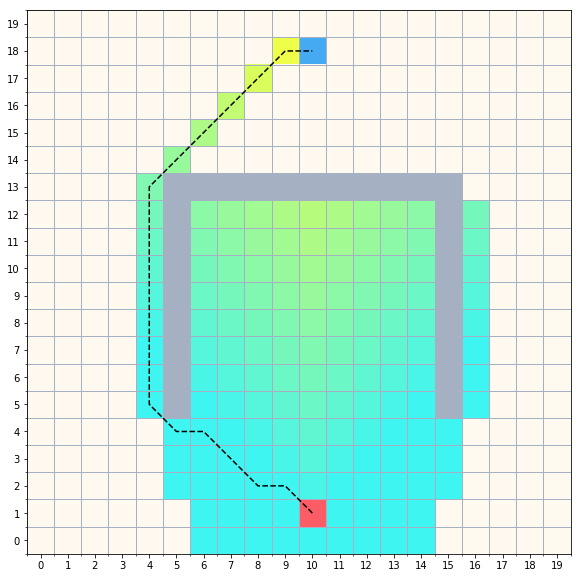

In [177]:
# https://rosettacode.org/wiki/A*_search_algorithm#Python

def a_star(grid, start, end):
    
    visited   = set()      # closed set
    unvisited = set([start]) # open set
    prev      = {start: None}
    
    g_scores = {start: 0}
    f_scores = {start: grid.h(start, end)}
    
    while unvisited:
        current_cell_score = (None, float('Inf')) # node, min_dist
        
        for (cell, score) in f_scores.items():
            if cell in unvisited and score < current_cell_score[1]:
                current_cell_score = (cell, score)
                
        current = current_cell_score[0]
        
        if current is None:
            raise ValueError("Could not reach end node.")
                
        if current == end:
            
            path = []
            while start not in path:
                path = [current] + path
                current = prev[current]

            cost = g_scores[end]
            return (path, cost, visited)
            
            
        unvisited.remove(current)
        visited.add(current)
        
        for neighbour in grid.neighbours(current):
            if neighbour in visited:
                continue
                
            g_score = g_scores[current] + grid.g(current, neighbour)

            if neighbour not in unvisited:
                unvisited.add(neighbour)
            elif g_score >= g_scores[neighbour]:
                continue # not better than current score

            prev[neighbour] = current
            g_scores[neighbour] = g_score
            f_scores[neighbour] = g_score + grid.h(neighbour, end)

        
path, cost, attempts = a_star(grid, start, end)

print("Cost:", cost)
grid.show(start, end, path, attempts)